B
B
[[  4.09200000e+04   8.32697600e+00   9.53952000e-01]
 [  1.44880000e+04   7.15346900e+00   1.67390400e+00]
 [  2.60520000e+04   1.44187100e+00   8.05124000e-01]
 [  7.51360000e+04   1.31473940e+01   4.28964000e-01]
 [  3.83440000e+04   1.66978800e+00   1.34296000e-01]
 [  7.29930000e+04   1.01417400e+01   1.03295500e+00]
 [  3.59480000e+04   6.83079200e+00   1.21319200e+00]
 [  4.26660000e+04   1.32763690e+01   5.43880000e-01]
 [  6.74970000e+04   8.63157700e+00   7.49278000e-01]
 [  3.54830000e+04   1.22731690e+01   1.50805300e+00]
 [  5.02420000e+04   3.72349800e+00   8.31917000e-01]
 [  6.32750000e+04   8.38587900e+00   1.66948500e+00]
 [  5.56900000e+03   4.87543500e+00   7.28658000e-01]
 [  5.10520000e+04   4.68009800e+00   6.25224000e-01]
 [  7.73720000e+04   1.52995700e+01   3.31351000e-01]
 [  4.36730000e+04   1.88946100e+00   1.91283000e-01]
 [  6.13640000e+04   7.51675400e+00   1.26916400e+00]
 [  6.96730000e+04   1.42391950e+01   2.61333000e-01]
 [  1.56690000e+04   0.0

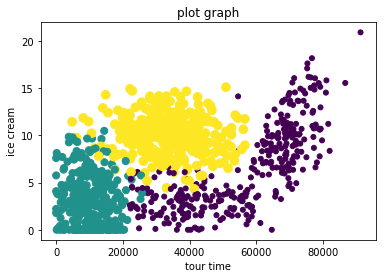

[[ 0.44832535  0.39805139  0.56233353]
 [ 0.15873259  0.34195467  0.98724416]
 [ 0.28542943  0.06892523  0.47449629]
 ..., 
 [ 0.29115949  0.50910294  0.51079493]
 [ 0.52711097  0.43665451  0.4290048 ]
 [ 0.47940793  0.3768091   0.78571804]] [  9.12730000e+04   2.09193490e+01   1.69436100e+00] [ 0.        0.        0.001156]
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
t

In [2]:
# %load kNN.py
from numpy import *
import operator
# 使用matplotlib创建散点图
import matplotlib
import matplotlib.pyplot as plt


# 创建样本
def createDataSet():
    group = array([[1.0, 1.1, ], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels


# 分类函数
#inX待分类的样本坐标  dataSet原始样本坐标全集  labels样本全集标签   k样本排序后采用的个数
#返回值 带分类样本标签
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]  # 行数
    # 以下三行计算距离
    diffMat = tile(inX, (dataSetSize, 1)) - dataSet  # 计算输入标签和其他标签的距离差
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis=1)  # 对于二维数组 axis=1表示按行相加 , axis=0表示按列相加。每列为不同点之间的距离cha

    distances = sqDistances ** 0.5
    sortedDistIndicies = distances.argsort()  # 获得排序后各元素索引
    # print(distances,sortedDistIndicies)
    classCount = {}

    # 以下两行 选取距离最近的k个点
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1  # get 方法 如果字典里面找不到这个值，返回输入的参数0
    # print(classCount.items())
    # 排序
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    # operator.itemgetter()函数 获取对象某些位置的数据
    return sortedClassCount[0][0]


# 将txt文件转化为可以识别的矩阵   返回值：原始数据列表  对应属于的类别列表
def file2matrix(filename):
    fr = open(filename)
    arrayOlines = fr.readlines()
    numberOfLines = len(arrayOlines)  # 文件行数
    returnMat = zeros((numberOfLines, 3))  # 多行三列
    classLabelVector = []

    index = 0
    # 解析文件数据到列表
    for line in arrayOlines:
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index, :] = listFromLine[0:3]  # return为一个矩阵 这表示把读取到的数据赋值给矩阵的第几行
        classLabelVector.append(int(listFromLine[-1]))  # 列表中最后一列
        index += 1
    return returnMat, classLabelVector


# 归一化函数
def autoNorm(dataSet):
    minVals = dataSet.min(0)  # 参数0表示获取矩阵中每列中最小值，如说输入是三列矩阵，输出也为三列矩阵
    maxVals = dataSet.max(0)  # 参数0表示获取矩阵中每列中最大值，如果是1就是获取行的
    ranges = maxVals - minVals
    m = dataSet.shape[0]  # 获取行值
    normDataSet = dataSet - tile(minVals, (m, 1))
    normDataSet = normDataSet / tile(ranges, (m, 1))  # 直接是矩阵中的数值相除，而不是矩阵除法
    return normDataSet, ranges, minVals


# 进行测试文件
def datingClassTest():
    hoRatio = 0.1
    # 获取数据
    datingDataMat, datingLabels = file2matrix(txtfile)
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]  # 获取行值
    numTestVecs = int(m * hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        # 选取前n个样本 和之后所有的样本进行比较
        classifierResult = classify0(normMat[i, :], normMat[numTestVecs:m, :], \
                                     datingLabels[numTestVecs:m], 4)
        print("the classifier came back with: %d, the real answer is: %d" % (classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]):
            errorCount += 1.0
    print("the total error rate is: %f" % (errorCount / float(numTestVecs)))


if __name__=='__main__':
    # 显示分类数据
    group, labels = createDataSet()
    print(classify0([0, 0], group, labels, 3))
    print(classify0([0.2, 0.5], group, labels, 3))

    # 打开文件，预览前20个数据
    txtfile = 'D:\PythonCode\jupyter\Machine\machinelearninginaction\Ch02\datingTestSet2.txt'
    datingDataMat, datingLabels = file2matrix(txtfile)
    datingDataMat20 = datingDataMat[0:20]
    print(datingDataMat20)

    # 画图表示
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(datingDataMat[:, 0], datingDataMat[:, 1], 25.0 * array(datingLabels), 15.0 * array(datingLabels))
    # 旅行时间（第一列） x轴玩游戏所占时间百分比（第二列）  y轴每周所消耗冰淇淋公升数（第三列）
    # datingDataMat20[1:2,1]   #这句话应该这么理解 [1:2,1] 中,为分隔符,取第二列中的元素切片，第一个，第二个做切片，
    # scatter(x, y, 点的大小, 颜色，标记)，这是最主要的几个用法  颜色可以直接使用几个不同的数字代替，比如1，2，3代表三种不同颜色，
    # 也可以使用字母表示
    ax.set_title('plot graph')
    # plt.legend('不喜欢','魅力一般','极具魅力')
    plt.xlabel('tour time')
    plt.ylabel('ice cream')
    plt.show()

    # 归一化
    normMat, ranges, minVals = autoNorm(datingDataMat)
    print(normMat, ranges, minVals)

    # 测试函数
    datingClassTest()


In [3]:
from os import listdir#获取文件夹目录下所有文件列表
#32*32图像转化为1*1024矩阵数组
def img2vector(filename):
    returnVect=zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr=fr.readline()#每行
        for j in range(32):
            returnVect[0,32*i+j]=int(lineStr[j])#每个字符就是一个数字
    return returnVect
#手写数字识别测试代码
#该函数是比较32*32的图像之间整体的相似度，所以把这32*32个点转化为了整体的一个1*1024矩阵
#计算距离的时候，使用的相当于1024列平方和 之后再开方算距离
def handwritingClassTest():
    traindir=r'D:\PythonCode\jupyter\Machine\machinelearninginaction\Ch02\digits\trainingDigits'
    hwLabels=[]
    trainingFileList=listdir(traindir)#获取目录下所有文件名
    #获取目录内容
    m=len(trainingFileList)
    trainingMat=zeros((m,1024))
    print('总共有%d组训练数据'%m)
    for i in range(m):
        #从文件名解析分类数字
        fileNameStr=trainingFileList[i]
        fileStr=fileNameStr.split('.')[0]
        classNumStr=int(fileStr.split('_')[0])#获得该文件表示的数字
        hwLabels.append(classNumStr)#存储该文件表示的数字
        trainingMat[i,:]=img2vector(traindir + '/' + fileNameStr )
        
    testdir=r'D:\PythonCode\jupyter\Machine\machinelearninginaction\Ch02\digits\testDigits'
    testFileList=listdir(testdir)
    #print(testFileList) testFileList进行了自动排序
    errorCount=0.0
    mTest=len(testFileList)
    for i in range(mTest):
        fileNameStr=testFileList[i]
        fileStr=fileNameStr.split('.')[0]
        classNumStr=int(fileStr.split('_')[0])#获得该文件表示的数字
        vectorUnderTest=img2vector(testdir + '/' + fileNameStr )
        classifierResult=classify0(vectorUnderTest,trainingMat,hwLabels,5)
        print("the classifier came back with:%d .the real answer is:%d"%(classifierResult,classNumStr))
        if classifierResult!=classNumStr:
            errorCount+=1
            
    print("\nnthe total number of errors is:%d "%errorCount)
    print("\nthe total error rate is: %f"%(errorCount/float(mTest)))
#执行
handwritingClassTest()

总共有1934组训练数据
the classifier came back with:0 .the real answer is:0
the classifier came back with:0 .the real answer is:0
the classifier came back with:0 .the real answer is:0
the classifier came back with:0 .the real answer is:0
the classifier came back with:0 .the real answer is:0
the classifier came back with:0 .the real answer is:0
the classifier came back with:0 .the real answer is:0
the classifier came back with:0 .the real answer is:0
the classifier came back with:0 .the real answer is:0
the classifier came back with:0 .the real answer is:0
the classifier came back with:0 .the real answer is:0
the classifier came back with:0 .the real answer is:0
the classifier came back with:0 .the real answer is:0
the classifier came back with:0 .the real answer is:0
the classifier came back with:0 .the real answer is:0
the classifier came back with:0 .the real answer is:0
the classifier came back with:0 .the real answer is:0
the classifier came back with:0 .the real answer is:0
the classifier 

the classifier came back with:1 .the real answer is:1
the classifier came back with:1 .the real answer is:1
the classifier came back with:1 .the real answer is:1
the classifier came back with:1 .the real answer is:1
the classifier came back with:1 .the real answer is:1
the classifier came back with:1 .the real answer is:1
the classifier came back with:1 .the real answer is:1
the classifier came back with:1 .the real answer is:1
the classifier came back with:1 .the real answer is:1
the classifier came back with:1 .the real answer is:1
the classifier came back with:1 .the real answer is:1
the classifier came back with:1 .the real answer is:1
the classifier came back with:1 .the real answer is:1
the classifier came back with:1 .the real answer is:1
the classifier came back with:1 .the real answer is:1
the classifier came back with:1 .the real answer is:1
the classifier came back with:1 .the real answer is:1
the classifier came back with:1 .the real answer is:1
the classifier came back wit

the classifier came back with:3 .the real answer is:3
the classifier came back with:3 .the real answer is:3
the classifier came back with:3 .the real answer is:3
the classifier came back with:3 .the real answer is:3
the classifier came back with:3 .the real answer is:3
the classifier came back with:3 .the real answer is:3
the classifier came back with:3 .the real answer is:3
the classifier came back with:3 .the real answer is:3
the classifier came back with:3 .the real answer is:3
the classifier came back with:3 .the real answer is:3
the classifier came back with:3 .the real answer is:3
the classifier came back with:3 .the real answer is:3
the classifier came back with:3 .the real answer is:3
the classifier came back with:8 .the real answer is:3
the classifier came back with:3 .the real answer is:3
the classifier came back with:3 .the real answer is:3
the classifier came back with:3 .the real answer is:3
the classifier came back with:3 .the real answer is:3
the classifier came back wit

the classifier came back with:4 .the real answer is:4
the classifier came back with:4 .the real answer is:4
the classifier came back with:4 .the real answer is:4
the classifier came back with:4 .the real answer is:4
the classifier came back with:4 .the real answer is:4
the classifier came back with:4 .the real answer is:4
the classifier came back with:4 .the real answer is:4
the classifier came back with:4 .the real answer is:4
the classifier came back with:4 .the real answer is:4
the classifier came back with:4 .the real answer is:4
the classifier came back with:4 .the real answer is:4
the classifier came back with:4 .the real answer is:4
the classifier came back with:4 .the real answer is:4
the classifier came back with:4 .the real answer is:4
the classifier came back with:4 .the real answer is:4
the classifier came back with:5 .the real answer is:5
the classifier came back with:5 .the real answer is:5
the classifier came back with:5 .the real answer is:5
the classifier came back wit

the classifier came back with:6 .the real answer is:6
the classifier came back with:6 .the real answer is:6
the classifier came back with:6 .the real answer is:6
the classifier came back with:6 .the real answer is:6
the classifier came back with:6 .the real answer is:6
the classifier came back with:6 .the real answer is:6
the classifier came back with:6 .the real answer is:6
the classifier came back with:6 .the real answer is:6
the classifier came back with:6 .the real answer is:6
the classifier came back with:6 .the real answer is:6
the classifier came back with:6 .the real answer is:6
the classifier came back with:6 .the real answer is:6
the classifier came back with:6 .the real answer is:6
the classifier came back with:6 .the real answer is:6
the classifier came back with:6 .the real answer is:6
the classifier came back with:6 .the real answer is:6
the classifier came back with:6 .the real answer is:6
the classifier came back with:6 .the real answer is:6
the classifier came back wit

the classifier came back with:8 .the real answer is:8
the classifier came back with:8 .the real answer is:8
the classifier came back with:8 .the real answer is:8
the classifier came back with:6 .the real answer is:8
the classifier came back with:8 .the real answer is:8
the classifier came back with:8 .the real answer is:8
the classifier came back with:8 .the real answer is:8
the classifier came back with:8 .the real answer is:8
the classifier came back with:8 .the real answer is:8
the classifier came back with:8 .the real answer is:8
the classifier came back with:8 .the real answer is:8
the classifier came back with:8 .the real answer is:8
the classifier came back with:8 .the real answer is:8
the classifier came back with:8 .the real answer is:8
the classifier came back with:8 .the real answer is:8
the classifier came back with:8 .the real answer is:8
the classifier came back with:3 .the real answer is:8
the classifier came back with:8 .the real answer is:8
the classifier came back wit

the classifier came back with:9 .the real answer is:9
the classifier came back with:9 .the real answer is:9
the classifier came back with:5 .the real answer is:9
the classifier came back with:9 .the real answer is:9
the classifier came back with:9 .the real answer is:9
the classifier came back with:9 .the real answer is:9
the classifier came back with:9 .the real answer is:9
the classifier came back with:9 .the real answer is:9
the classifier came back with:9 .the real answer is:9
the classifier came back with:9 .the real answer is:9
the classifier came back with:9 .the real answer is:9
the classifier came back with:9 .the real answer is:9
the classifier came back with:9 .the real answer is:9
the classifier came back with:9 .the real answer is:9
the classifier came back with:9 .the real answer is:9
the classifier came back with:9 .the real answer is:9
the classifier came back with:9 .the real answer is:9
the classifier came back with:9 .the real answer is:9
the classifier came back wit